In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from runner import TestRunner, TestPlan, TestStep

In [56]:
in_fnam = "bottom_motor_sweep_01_13.csv"
out_fnam = "bottom_motor_sweep_01_13_formatted.csv"

with open(in_fnam, newline='') as in_file:
    with open(out_fnam, 'w', newline='') as out_file:
        writer = csv.writer(out_file)
        for row in csv.reader(in_file):
            if row:
                writer.writerow(row)

In [57]:
in_fnam = "top_motor_sweep_01_13.csv"
out_fnam = "top_motor_sweep_01_13_formatted.csv"

with open(in_fnam, newline='') as in_file:
    with open(out_fnam, 'w', newline='') as out_file:
        writer = csv.writer(out_file)
        for row in csv.reader(in_file):
            if row:
                writer.writerow(row)

In [58]:
bot_motor_data = TestRunner.load("bottom_motor_sweep_01_13_formatted.csv")
top_motor_data = TestRunner.load("top_motor_sweep_01_13_formatted.csv")

In [59]:
bot_hall_current = bot_motor_data.values("bottom_current_A")
top_hall_current = top_motor_data.values("top_current_A")
time_ms = bot_motor_data.values("time_ms")

throttle_ranges = [[500, 4500],[5500, 9500],[10500, 14500],[15500, 19500], [20500, 24500], [25500, 29500]]

In [67]:
bot_current_mean = [np.mean(bot_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[0][0])):np.argmin(np.abs(time_ms-throttle_ranges[0][1]))]),
                    np.mean(bot_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[1][0])):np.argmin(np.abs(time_ms-throttle_ranges[1][1]))]),
                    np.mean(bot_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[2][0])):np.argmin(np.abs(time_ms-throttle_ranges[2][1]))]),
                    np.mean(bot_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[3][0])):np.argmin(np.abs(time_ms-throttle_ranges[3][1]))]),
                    np.mean(bot_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[4][0])):np.argmin(np.abs(time_ms-throttle_ranges[4][1]))]),
                    np.mean(bot_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[5][0])):np.argmin(np.abs(time_ms-throttle_ranges[5][1]))])]

top_current_mean = [np.mean(top_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[0][0])):np.argmin(np.abs(time_ms-throttle_ranges[0][1]))]),
                    np.mean(top_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[1][0])):np.argmin(np.abs(time_ms-throttle_ranges[1][1]))]),
                    np.mean(top_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[2][0])):np.argmin(np.abs(time_ms-throttle_ranges[2][1]))]),
                    np.mean(top_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[3][0])):np.argmin(np.abs(time_ms-throttle_ranges[3][1]))]),
                    np.mean(top_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[4][0])):np.argmin(np.abs(time_ms-throttle_ranges[4][1]))]),
                    np.mean(top_hall_current[np.argmin(np.abs(time_ms-throttle_ranges[5][0])):np.argmin(np.abs(time_ms-throttle_ranges[5][1]))])]

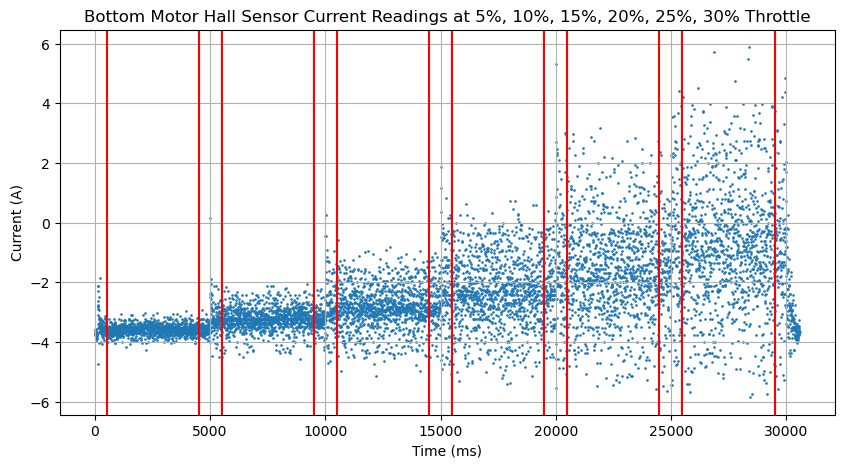

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(time_ms, bot_hall_current, s=0.8)
for i in range(len(throttle_ranges)):
    plt.axvline(throttle_ranges[i][0], color='r')
    plt.axvline(throttle_ranges[i][1], color='r')
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.title("Bottom Motor Hall Sensor Current Readings at 5%, 10%, 15%, 20%, 25%, 30% Throttle")
plt.grid()
plt.show()

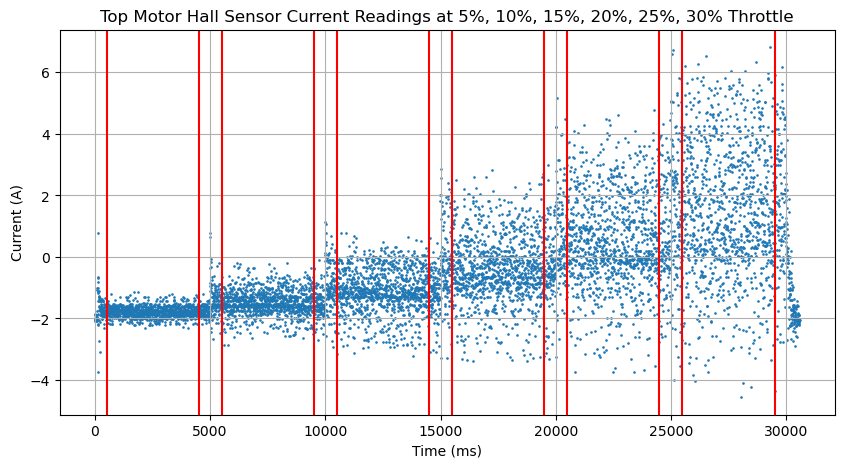

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(time_ms, top_hall_current, s=0.8)

for i in range(len(throttle_ranges)):
    plt.axvline(throttle_ranges[i][0], color='r')
    plt.axvline(throttle_ranges[i][1], color='r')

plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.title("Top Motor Hall Sensor Current Readings at 5%, 10%, 15%, 20%, 25%, 30% Throttle")
plt.grid()
plt.show()

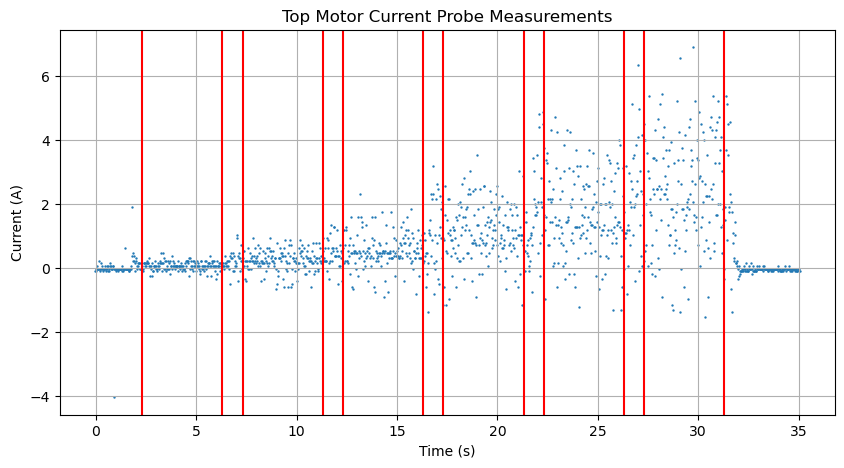

In [85]:
# Load CSV file
top_scope_file = 'top_motor_scope_01_13.csv'
top_data = np.genfromtxt(top_scope_file, delimiter=',')

# Separate columns into NumPy arrays
top_scope_time_s = top_data[400:, 0]
top_scope_voltage_V = top_data[400:, 2]
top_scope_current_A = top_data[400:, 1]

# Set time intervals based on throttle changes
scope_throttle_ranges = [[2.3, 6.3],[7.3, 11.3],[12.3, 16.3],[17.3, 21.3], [22.3, 26.3], [27.3, 31.3]]

plt.figure(figsize=(10, 5))
plt.scatter(top_scope_time_s, top_scope_current_A, s=0.5)

for i in range(len(throttle_ranges)):
    plt.axvline(scope_throttle_ranges[i][0], color='r')
    plt.axvline(scope_throttle_ranges[i][1], color='r')

plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Top Motor Current Probe Measurements")
plt.grid()
plt.show()

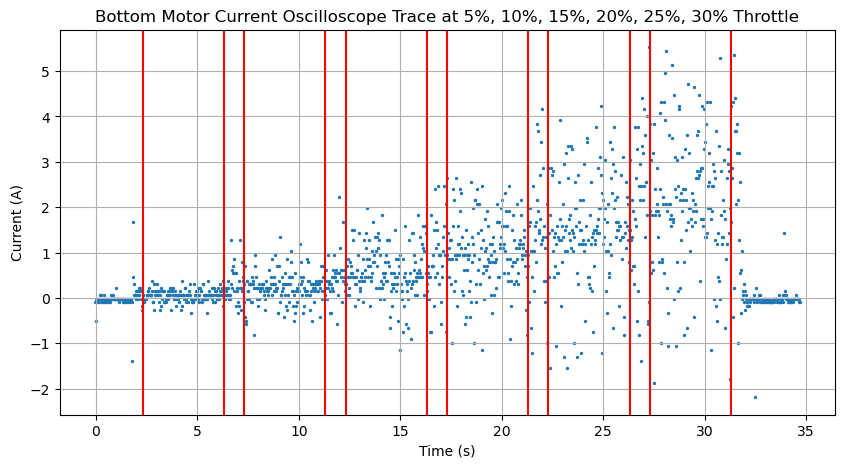

In [89]:
# Load CSV file
bottom_scope_file = 'bottom_motor_scope_01_13.csv'
bottom_data = np.genfromtxt(bottom_scope_file, delimiter=',')

# Separate columns into NumPy arrays
bottom_scope_time_s = bottom_data[400:-200, 0]
bottom_scope_voltage_V = bottom_data[400:-200, 2]
bottom_scope_current_A = bottom_data[400:-200, 1]

plt.figure(figsize=(10, 5))
plt.scatter(bottom_scope_time_s, bottom_scope_current_A, s=2)

for i in range(len(throttle_ranges)):
    plt.axvline(scope_throttle_ranges[i][0], color='r')
    plt.axvline(scope_throttle_ranges[i][1], color='r')

plt.title("Bottom Motor Current Oscilloscope Trace at 5%, 10%, 15%, 20%, 25%, 30% Throttle")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.grid()

In [72]:
bot_current_scope = [np.mean(bottom_scope_current_A[np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[i][0])):np.argmin(np.abs(bottom_scope_time_s-scope_throttle_ranges[i][1]))]) for i in range(len(throttle_ranges))]
top_current_scope = [np.mean(top_scope_current_A[np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[i][0])):np.argmin(np.abs(top_scope_time_s-scope_throttle_ranges[i][1]))]) for i in range(len(throttle_ranges))]

top_current_scope

[0.07035168750000001,
 0.23969931249999998,
 0.544723625,
 1.1010056250000002,
 1.6698494375,
 2.333668625]

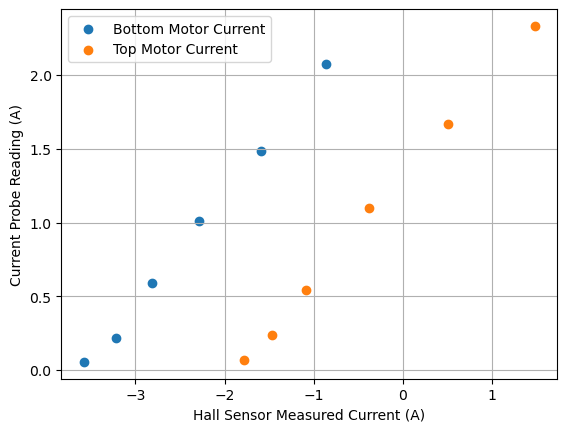

In [74]:
plt.figure()
plt.scatter(bot_current_mean, bot_current_scope, label="Bottom Motor Current")
plt.scatter(top_current_mean, top_current_scope, label="Top Motor Current")
plt.xlabel("Hall Sensor Measured Current (A)")
plt.ylabel("Current Probe Reading (A)")
plt.legend()
plt.grid()
plt.show()

In [75]:
def calibrated_current(measured_current, gain, offset):
    return gain * measured_current + offset

In [76]:
from scipy.optimize import curve_fit

In [81]:
bot_popt,_ = curve_fit(calibrated_current, bot_current_mean, bot_current_scope)
top_popt,_ = curve_fit(calibrated_current, top_current_mean, top_current_scope)
current = np.linspace(-4, 2, 2)

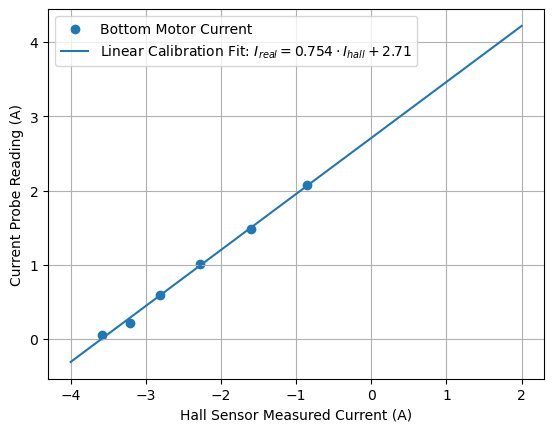

In [97]:
plt.figure()
plt.scatter(bot_current_mean, bot_current_scope, label="Bottom Motor Current")
#plt.scatter(top_current_mean, top_current_scope, label="Top Motor Current")
plt.plot(current, calibrated_current(current, bot_popt[0], bot_popt[1]), label="Linear Calibration Fit: $I_{real} = 0.754\cdot I_{hall} + 2.71$")
#plt.plot(current, calibrated_current(current, top_popt[0], top_popt[1]))

plt.xlabel("Hall Sensor Measured Current (A)")
plt.ylabel("Current Probe Reading (A)")
plt.legend()
plt.grid()
plt.show()

In [84]:
print("Top Motor Calibration: " + str(top_popt[0]) + " I + " + str(top_popt[1]))
print("Bottom Motor Calibration: " + str(bot_popt[0]) + " I + " + str(bot_popt[1]))

Top Motor Calibration: 0.7032473456167234 I + 1.314960944646724
Bottom Motor Calibration: 0.7542579695740452 I + 2.708511248238872


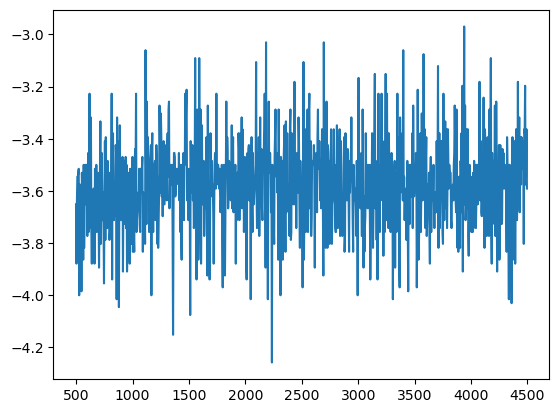

In [112]:
bot_5pct_throttle_current = bot_hall_current[np.argmin(np.abs(time_ms -  throttle_ranges[0][0])):np.argmin(np.abs(time_ms -  throttle_ranges[0][1]))]
plt.plot(time_ms[np.argmin(np.abs(time_ms -  throttle_ranges[0][0])):np.argmin(np.abs(time_ms -  throttle_ranges[0][1]))], bot_5pct_throttle_current)

In [143]:
fft_5pct_result = np.fft.fft(bot_5pct_throttle_current)

sample_diff = np.diff(time_ms)
sample_rate = np.mean(sample_diff) * 1e3
freq = np.fft.fftfreq(len(fft_5pct_result), 1/(sample_rate))
magnitude = np.abs(fft_5pct_result)


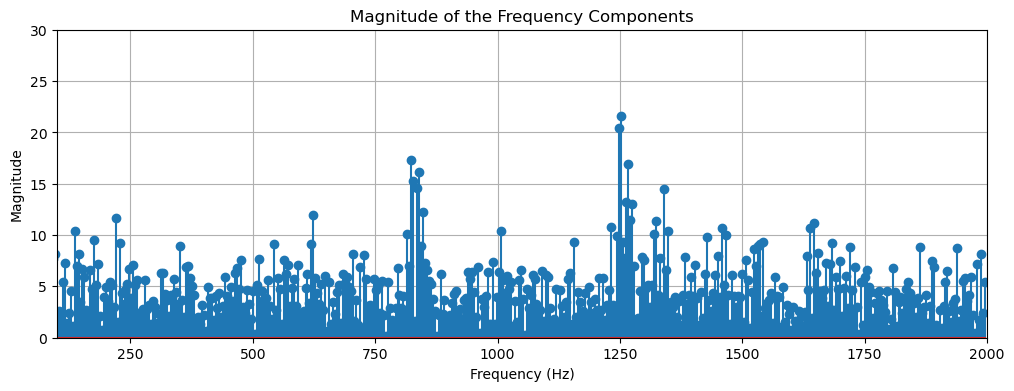

In [149]:
# Create a stem plot
plt.figure(figsize=(12, 4))
plt.stem(freq, magnitude)
plt.xlim(100, 2000)
plt.ylim(0, 30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude of the Frequency Components')
plt.grid(True)
plt.show()

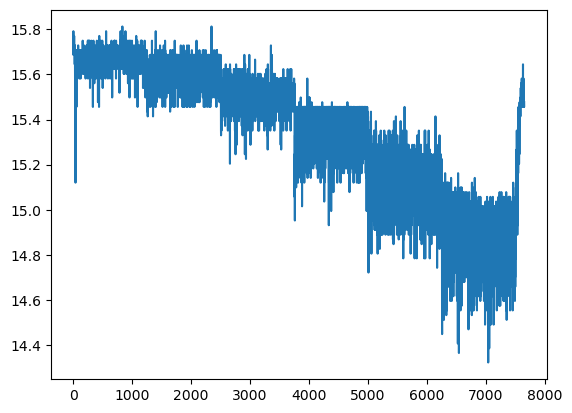

In [161]:
vbat = bot_motor_data.values("batt_voltage_V")
vbat_scope = bottom_scope_voltage_V

plt.plot(vbat)

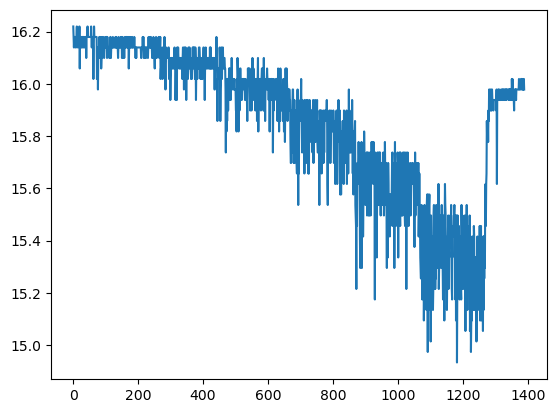

In [162]:
plt.plot(vbat_scope)